<a href="https://www.kaggle.com/code/larsmagnusson/itf31519-pml-decision-trees-and-svms?scriptVersionId=106150167" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uci-wine/wine.data


In [2]:
# Load the dataset. This dataset is arguable too simple/easy for testing and 
# comparing SVMs and decision trees
uci_wine = pd.read_csv('/kaggle/input/uci-wine/wine.data',header=None)

# Convert to category type on the target column (the first column). This is 
# a good habit, but not always required (as in the case of SVC and DecisionTreeClassifier)
uci_wine[0] = uci_wine[0].astype('category')

uci_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Stratified sampling 80/20 split
uci_wine_train = uci_wine.groupby(0, group_keys=False).apply(lambda group: group.sample(frac=0.8))
uci_wine_test = uci_wine.drop(uci_wine_train.index)

# Show simple statistics for the dataframe
uci_wine_test.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,13.069167,2.591944,2.327500,19.344444,100.638889,2.220000,1.898333,0.353889,1.564444,4.740278,0.928889,2.567778,748.083333
std,0.900687,1.237155,0.287277,3.506764,13.386886,0.566014,1.003621,0.111593,0.722683,2.431815,0.217226,0.784981,276.819113
min,11.460000,0.940000,1.360000,10.600000,82.000000,1.380000,0.470000,0.140000,0.410000,1.280000,0.540000,1.270000,325.000000
25%,12.330000,1.670000,2.170000,16.550000,89.750000,1.695000,0.900000,0.270000,1.202500,2.875000,0.750000,1.815000,559.000000
50%,13.330000,2.140000,2.360000,20.000000,99.000000,2.125000,1.970000,0.340000,1.510000,4.100000,0.915000,2.755000,707.500000
75%,13.715000,3.617500,2.495000,21.500000,108.500000,2.602500,2.657500,0.430000,1.877500,5.737500,1.070000,3.202500,1035.000000
max,14.750000,5.650000,2.740000,26.000000,136.000000,3.250000,3.690000,0.630000,3.580000,10.680000,1.360000,4.000000,1285.000000


In [4]:
# Split into features and ground thruths/target values
train_targets = uci_wine_train[0]
train_features = uci_wine_train.drop(0, axis=1)

test_targets = uci_wine_test[0]
test_features = uci_wine_test.drop(0, axis=1)

In [5]:
# Import libraries necessary for SVM classification via sklearn
from sklearn.pipeline import make_pipeline # for creating a layered classification pipeline
from sklearn.preprocessing import StandardScaler # provide mean normalization
from sklearn.svm import SVC # The SVM classifier

# Create the classifier object (SVM with linear kernel), The first alternative 
# uses the setup recommended by the guide (a pipeline with integrated normalization), 
# while the second trains the classifier on the non-normalized data. SVM is not 
# scale-invariant, so it is highly recommended to normalize the data (improves generalability) 
svc_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svc_classifier.fit(train_features, train_targets)
#svc_classifier = SVC(kernel='linear')
#svc_classifier.fit(train_features, train_targets)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [6]:
# Import the linear SVC
from sklearn.svm import LinearSVC

# The linear SVC is a quicker implementation of SVC. Works with bigger amounts of 
# data, and sparse data.
linear_classifier = make_pipeline(StandardScaler(), LinearSVC())
linear_classifier.fit(train_features, train_targets)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [7]:
# Get the accuracy of the SVC classifier on training data
svc_classifier.score(train_features, train_targets)

1.0

In [8]:
# Get the accuracy of the SVC classifier on test data
svc_classifier.score(test_features, test_targets)

0.9444444444444444

In [9]:
# Get the accuracy of the LinearSVC classifier on test data
linear_classifier.score(uci_wine_test.drop(0, axis=1), uci_wine_test[0])

0.9444444444444444

In [10]:
# Import decision tree functionality
from sklearn.tree import DecisionTreeClassifier

# Create decision tree classifier and fit it to the data. Here we use entropy as the 
# split criterion and we have set the min_samples_split to 5 to try to reduce overfitting
decision_tree = DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
# Note that the fit function takes a list of integers or strings as class labels i.e.
# we don't have to worry with converting to category-type or with ordinal issues
decision_tree.fit(train_features, train_targets)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [11]:
# Get the DT classifier performance on training data
decision_tree.score(train_features, train_targets)

0.9929577464788732

In [12]:
# Get the DT classifier performance on test data
decision_tree.score(test_features, test_targets)

0.9722222222222222

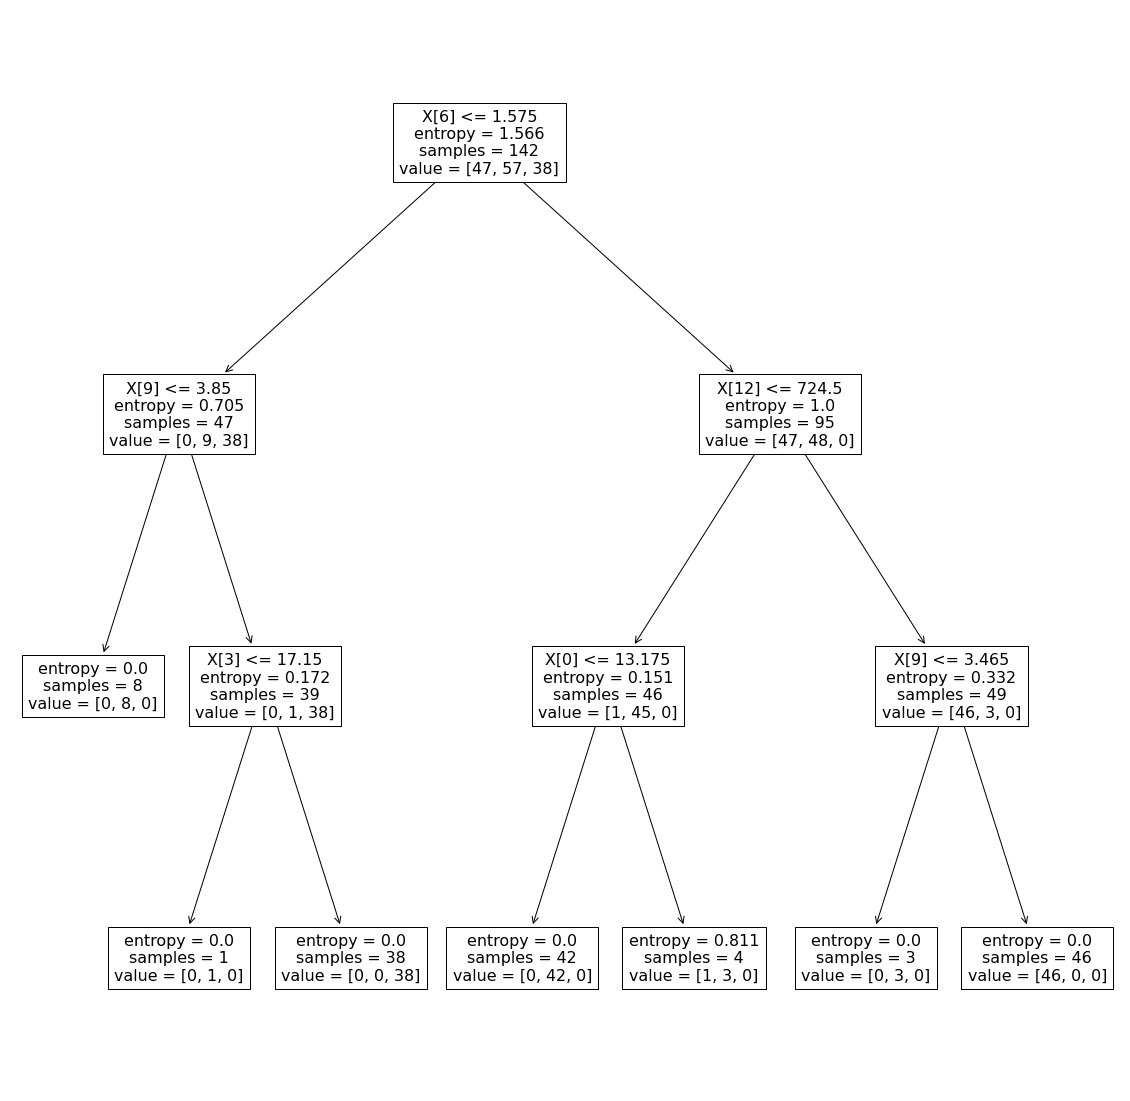

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree with a specific size
plt.figure(figsize=(20,20))
plot_tree(decision_tree)
plt.show()